In [8]:
# Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [9]:
df = pd.read_csv('C:/git/Machine-Learning-A-Z-Udemy/data_files/50_Startups.csv')

In [10]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


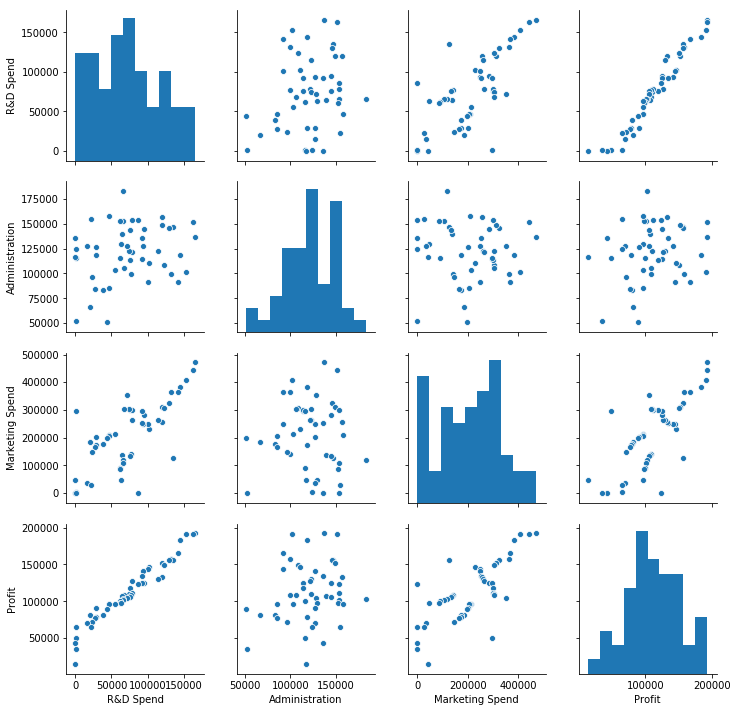

In [11]:
sns.pairplot(df)

In [12]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [15]:
X = df[['R&D Spend', 'Administration', 'Marketing Spend', 'State']]
y = df['Profit']

In [17]:
df.isnull().any()

R&D Spend          False
Administration     False
Marketing Spend    False
State              False
Profit             False
dtype: bool

In [37]:
import category_encoders as ce
ohe = ce.OneHotEncoder(handle_unknown='ignore', use_cat_names=True,cols='State')
X_train_ohe = ohe.fit_transform(X)
#Eliminando a ultima coluna para não gerar problema no modelo (dummy Trap )
X = X_train_ohe.iloc[:,:-1]

In [39]:
X = X_train_ohe

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [44]:
from sklearn.linear_model import LinearRegression
lm =LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [45]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
R&D Spend,0.773467
Administration,0.032885
Marketing Spend,0.036610
State_New York,1658.653213
State_California,959.284160


In [46]:
predictions = lm.predict(X_test)

In [50]:
import statsmodels.formula.api as sm

In [102]:
X.insert(loc=0,column='Ones',value=1)

In [62]:
X.head()

,Ones,R&D Spend,Administration,Marketing Spend,State_New York,State_California
0,1,165349.20,136897.80,471784.10,1,0
1,1,162597.70,151377.59,443898.53,0,1
2,1,153441.51,101145.55,407934.54,0,0
3,1,144372.41,118671.85,383199.62,1,0
4,1,142107.34,91391.77,366168.42,0,0


In [63]:
X.columns

Index(['Ones', 'R&D Spend', 'Administration', 'Marketing Spend',
       'State_New York', 'State_California'],
      dtype='object')

In [68]:
X_opt = X[['Ones', 'R&D Spend', 'Administration', 'Marketing Spend',
       'State_New York', 'State_California']]
regressor_OLS = sm.OLS(y,X_opt).fit()

In [69]:
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sun, 04 Aug 2019   Prob (F-statistic):           1.34e-27
Time:                        19:27:32   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Ones              5.032e+04   7251.767      6.940      0.000    3.57e+04    6.49e+04
R&D Spend            0.8060      0.046     17.369      0.000       0.712       0.900
Administration      -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing Spend      0.0270      0.017      1.574      0.123      -0.008       0.062
State_New York    -240.6758   3338.857     -0.072      0.943   -6969.701    6488.349
State_California  -198.7888   3371.007     -0.059      0.953   -6992.607    6595.030
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.56e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
X_opt = X[['Ones', 'R&D Spend', 'Administration', 'Marketing Spend',
       'State_New York']]
regressor_OLS = sm.OLS(y,X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Sun, 04 Aug 2019   Prob (F-statistic):           8.50e-29
Time:                        19:29:26   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Ones             5.018e+04   6747.623      7.437      0.000    3.66e+04    6.38e+04
R&D Spend           0.8059      0.046     17.571      0.000       0.714       0.898
Administration     -0.0269      0.052     -0.521      0.605      -0.131       0.077
Marketing Spend     0.0271      0.017      1.625      0.111      -0.007       0.061
State_New York   -136.5042   2801.719     -0.049      0.961   -5779.456    5506.447
==============================================================================
Omnibus:                       14.892   Durbin-Watson:                   1.284
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.665
Skew:                          -0.949   Prob(JB):                     1.97e-05
Kurtosis:                       5.608   Cond. No.                     1.43e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
X_opt = X[['Ones', 'R&D Spend', 'Administration', 'Marketing Spend']]
regressor_OLS = sm.OLS(y,X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 04 Aug 2019   Prob (F-statistic):           4.53e-30
Time:                        19:30:47   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Ones             5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
R&D Spend           0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
X_opt = X[['Ones', 'R&D Spend', 'Marketing Spend']]
regressor_OLS = sm.OLS(y,X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Sun, 04 Aug 2019   Prob (F-statistic):           2.16e-31
Time:                        19:31:03   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Ones             4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
R&D Spend           0.7966      0.041     19.266      0.000       0.713       0.880
Marketing Spend     0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
X_opt = X[['Ones', 'R&D Spend']]
regressor_OLS = sm.OLS(y,X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Sun, 04 Aug 2019   Prob (F-statistic):           3.50e-32
Time:                        19:34:04   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Ones        4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
R&D Spend      0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [90]:
series = regressor_OLS.pvalues

In [92]:
regressor_OLS.pvalues

Ones         2.782697e-24
R&D Spend    3.500322e-32
dtype: float64

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    1
30    1
31    1
32    1
33    1
34    1
35    1
36    1
37    1
38    1
39    1
40    1
41    1
42    1
43    1
44    1
45    1
46    1
47    1
48    1
49    1
Name: Ones, dtype: int64

In [76]:
X.head()

,Ones,R&D Spend,Administration,Marketing Spend,State_New York,State_California
0,1,165349.20,136897.80,471784.10,1,0
1,1,162597.70,151377.59,443898.53,0,1
2,1,153441.51,101145.55,407934.54,0,0
3,1,144372.41,118671.85,383199.62,1,0
4,1,142107.34,91391.77,366168.42,0,0


In [112]:
import statsmodels.formula.api as sm
def backwardElimination(x, sl):
    numVars = len(x.columns)
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues)
        if maxVar > sl:
            x.drop(labels=regressor_OLS.pvalues.idxmax(),axis=1,inplace=True)
    regressor_OLS.summary()
    return x
 
SL = 0.05
X_opt = X
X_Modeled = backwardElimination(X_opt, SL)

In [113]:
X_Modeled

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42
5,131876.90,99814.71,362861.36
6,134615.46,147198.87,127716.82
7,130298.13,145530.06,323876.68
8,120542.52,148718.95,311613.29
9,123334.88,108679.17,304981.62


In [107]:
X.insert(loc=0,column='Ones',value=1)
X.head()

,Ones,R&D Spend,Administration,Marketing Spend,State_New York,State_California
0,1,165349.20,136897.80,471784.10,1,0
1,1,162597.70,151377.59,443898.53,0,1
2,1,153441.51,101145.55,407934.54,0,0
3,1,144372.41,118671.85,383199.62,1,0
4,1,142107.34,91391.77,366168.42,0,0


In [84]:
len(X.columns)

6

2.7826969229654186e-24

In [118]:
# read data into a DataFrame
df = pd.read_csv('C:/git/Machine-Learning-A-Z-Udemy/Advertising.csv', index_col=0)
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [119]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [120]:
X = df[['TV', 'Radio', 'Newspaper']] 

In [121]:
y = df['Sales']

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


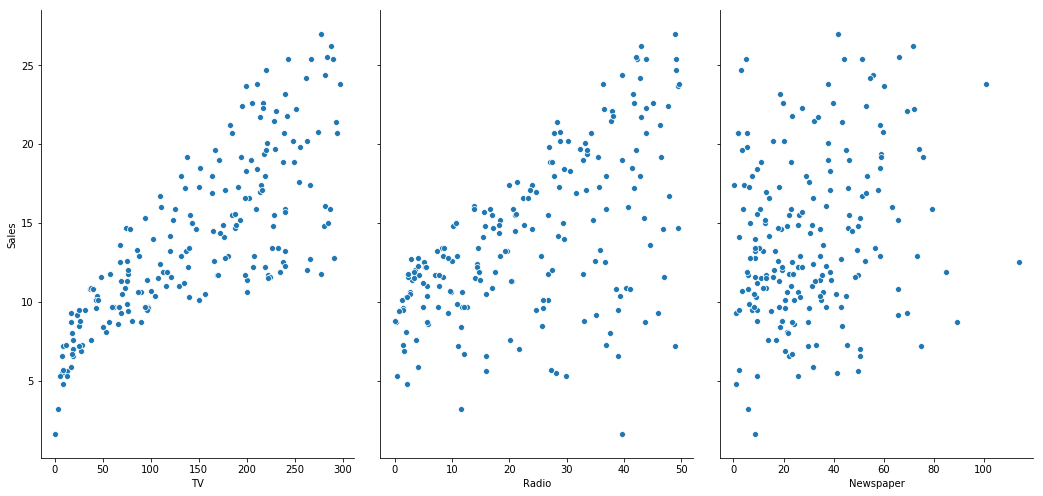

In [126]:
sns.pairplot(df,x_vars=['TV', 'Radio', 'Newspaper'],y_vars=['Sales'],size=7,aspect=0.7)